In [0]:
import numpy as np
import cv2

# Sobel x-axis kernel
SOBEL_X = np.array((
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]), dtype="int32")

# Sobel y-axis kernel
SOBEL_Y = np.array((
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]), dtype="int32")

# Gaussian kernel
GAUSS = np.array((
    [1/16, 2/16, 1/16],
    [2/16, 4/16, 2/16],
    [1/16, 2/16, 1/16]), dtype="float64")


def convolve(img, kernel):
    """Performs a naive convolution."""
    if kernel.shape[0] % 2 != 1 or kernel.shape[1] % 2 != 1:
        raise ValueError("Only odd dimensions on filter supported")

    img_height = img.shape[0]
    img_width = img.shape[1]
    pad_height = kernel.shape[0] // 2
    pad_width = kernel.shape[1] // 2
    # Allocate result image.
    pad = ((pad_height, pad_height), (pad_height, pad_width))
    g = np.empty(img.shape, dtype=np.float64)
    img = np.pad(img, pad, mode='constant', constant_values=0)
    # Do convolution
    for i in np.arange(pad_height, img_height+pad_height):
        for j in np.arange(pad_width, img_width+pad_width):
            roi = img[i - pad_height:i + pad_height +
                      1, j - pad_width:j + pad_width + 1]
            g[i - pad_height, j - pad_width] = (roi*kernel).sum()

    if (g.dtype == np.float64):
        kernel = kernel / 255.0
        kernel = (kernel*255).astype(np.uint8)
    else:
        g = g + abs(np.amin(g))
        g = g / np.amax(g)
        g = (g*255.0)

    return g


def harris(img, threshold=0.6):

    img_cpy = img.copy()

    # Grayscale
    img1_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    dx = convolve(img1_gray, SOBEL_X)
    dy = convolve(img1_gray, SOBEL_Y)

    dx2 = np.square(dx)
    dy2 = np.square(dy)
    dxdy = dx*dy

    g_dx2 = convolve(dx2, GAUSS)
    g_dy2 = convolve(dy2, GAUSS)
    g_dxdy = convolve(dxdy, GAUSS)

    harris = g_dx2*g_dy2 - np.square(g_dxdy) - 0.12*np.square(g_dx2 + g_dy2)

    cv2.normalize(harris, harris, 0, 1, cv2.NORM_MINMAX)

    # find all points above threshold
    loc = np.where(harris >= threshold)
    # loop though the points
    for pt in zip(*loc[::-1]):
        # draw filled circle on each point
        cv2.circle(img_cpy, pt,5, (255, 0, 0), -1)

    return img_cpy

In [39]:

%matplotlib inline
import matplotlib.pyplot as plt
import cv2
print("OpenCV Version : {} ".format(cv2.__version__))


OpenCV Version : 4.1.2 


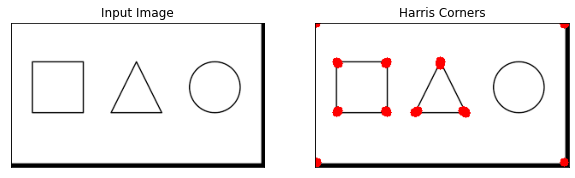

In [40]:
img = cv2.imread('/content/drive/My Drive/mtech_iitb/shap.png')
# create copy

corners = harris(img)

# display images
plt.figure(figsize=(10, 10))
plt.subplot(121), plt.imshow(img)
plt.title("Input Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(corners)
plt.title("Harris Corners"), plt.xticks([]), plt.yticks([])
plt.show()

#cv2.imwrite("output/q1.png", cv2.cvtColor(corners, cv2.COLOR_BGR2RGB))

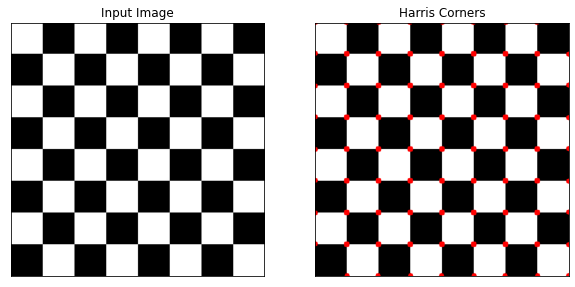

In [41]:
img = cv2.imread('/content/drive/My Drive/mtech_iitb/harris.jpg')
# create copy

corners = harris(img)

# display images
plt.figure(figsize=(10, 10))
plt.subplot(121), plt.imshow(img)
plt.title("Input Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(corners)
plt.title("Harris Corners"), plt.xticks([]), plt.yticks([])
plt.show()
